In [2]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.16.1


In [2]:
# Fetch AAPL (Apple Inc.) data
aapl_data = yf.download('AAPL', start='2019-01-01', end='2024-01-01')

# Display the first few rows of the dataframe
aapl_data.head()

NameError: name 'yf' is not defined

The columns 'Open' and 'Close' represent the price of the stock in the beginning and in the end of the day, respectively. The columns 'High' and 'Low' represent the highest and lowest values of the price of the stock through the day. The relationship between this four variables can be seen in the following plot, where it is depicted that 'High' and 'Low' upper bound and lower bound, respectively, the other two columns. The adjusted closing price, 'Adj Close', is a more complicated measure, and this is the measure usually used for stock prices analysis, therefore we try in this notebook to predict the adjuted closing price. A more detailed explanation on the adjusted closing prices can be found in the report.

In [1]:
aapl_data.head(n=21).drop(columns=['Volume']).plot(), plt.ylabel('Price in $');

NameError: name 'aapl_data' is not defined

The dataset contains no missing values:

In [5]:
print('Number of missing values in the data:', aapl_data.isnull().sum().sum())

Number of missing values in the data: 0


Let us now visualize the time series of the adjusted closing prices.

<Axes: title={'center': 'AAPL Adj Close Price ($)'}, xlabel='Date'>

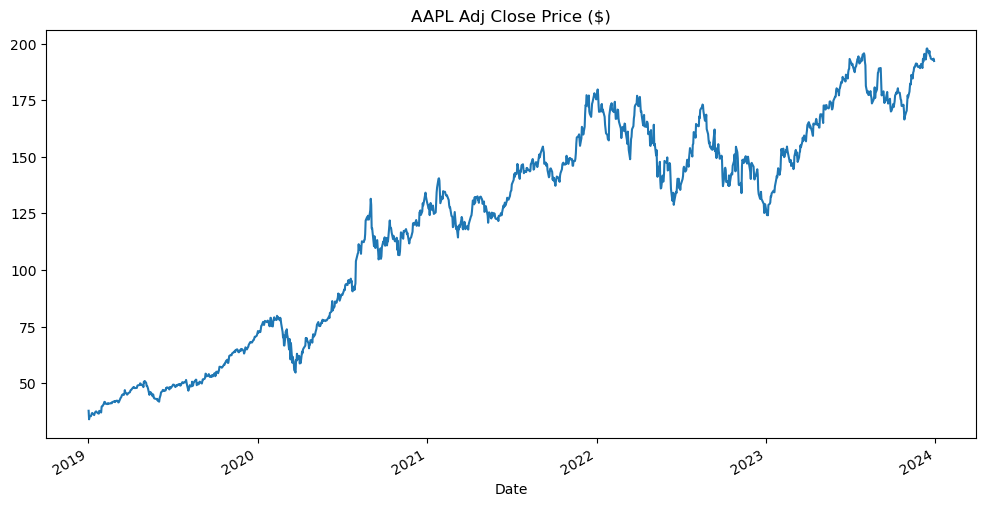

In [6]:
# plot the adjusted close price
aapl_data['Adj Close'].plot(title='AAPL Adj Close Price ($)', figsize=(12, 6))

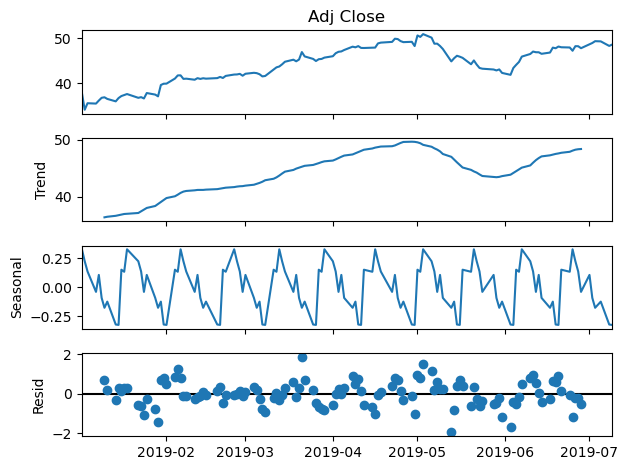

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(aapl_data['Adj Close'].head(n=130), model='additive', period=12)  # Adjust 'period' based on your data
result.plot()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=7994.261, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=6134.654, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=7075.663, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=8019.814, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6442.629, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=6015.497, Time=0.85 sec
 ARIMA(1,0,0)(3,1,0)[7] intercept   : AIC=5954.425, Time=1.71 sec
 ARIMA(1,0,0)(4,1,0)[7] intercept   : AIC=5911.013, Time=2.81 sec
 ARIMA(1,0,0)(5,1,0)[7] intercept   : AIC=5876.045, Time=5.74 sec
 ARIMA(1,0,0)(5,1,1)[7] intercept   : AIC=inf, Time=10.43 sec
 ARIMA(1,0,0)(4,1,1)[7] intercept   : AIC=inf, Time=4.51 sec
 ARIMA(0,0,0)(5,1,0)[7] intercept   : AIC=7998.176, Time=4.33 sec
 ARIMA(2,0,0)(5,1,0)[7] intercept   : AIC=5877.844, Time=5.81 sec
 ARIMA(1,0,1)(5,1,0)[7] intercept   : AIC=5877.851, Time=6.25 sec
 ARIMA(0,0,1)(5,1,0)[7] intercept   : AIC=

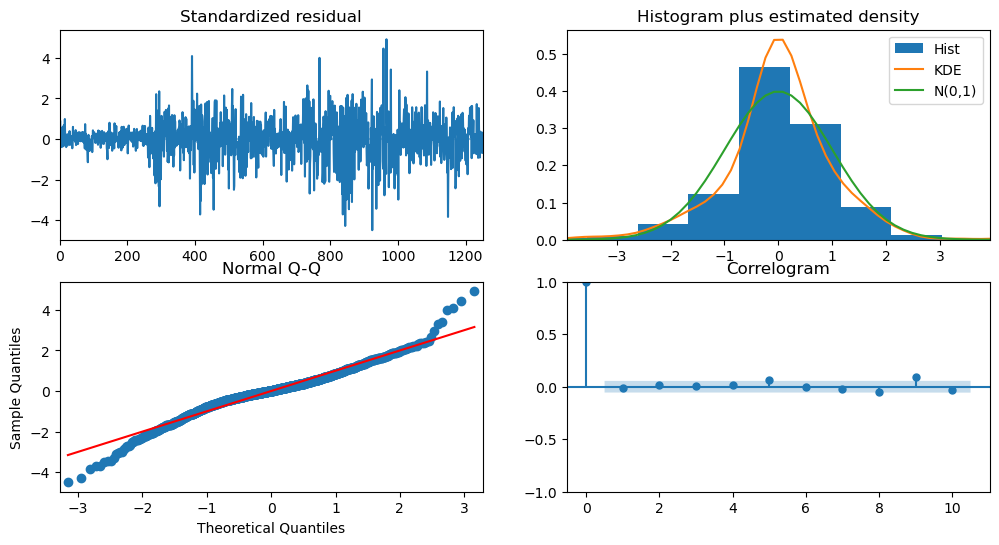

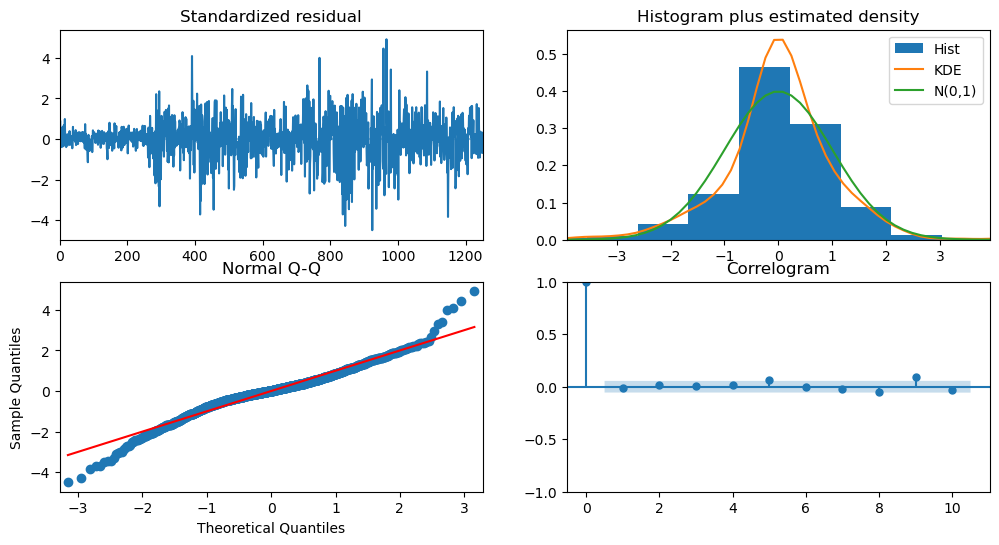

In [8]:
from pmdarima import auto_arima
# m is the seasonal period (e.g., 12 for monthly data with yearly seasonality)
model = model =  auto_arima(aapl_data['Adj Close'],start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=7, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

model.plot_diagnostics(figsize=(12, 6))

Let us visualize the 'Volume' data, which represents the number of shares traded during the trading day. Since this time series is more fluctating, we find it more informative to look at one specific year, 2023.

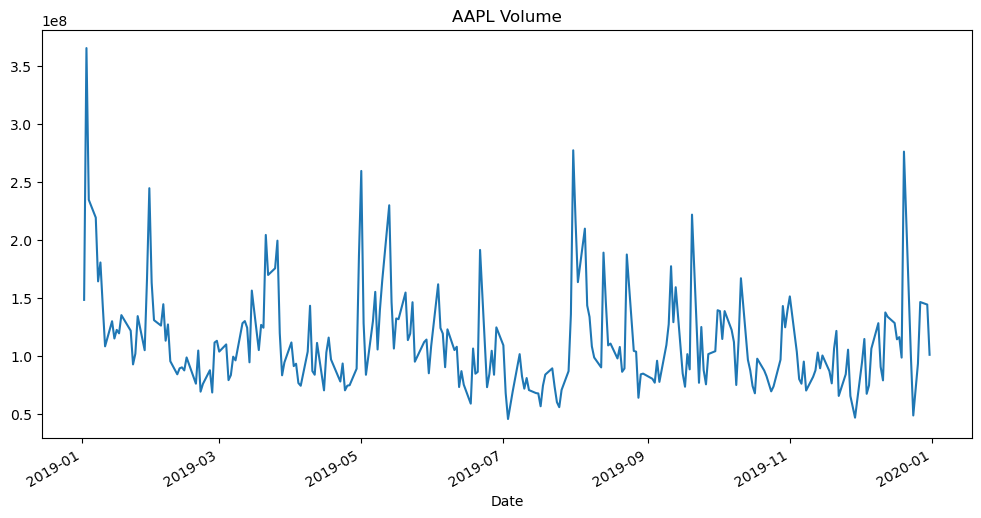

In [9]:
aapl_2023 = aapl_data[aapl_data.index.year == 2019]  # keep only the data for 2023
aapl_2023['Volume'].plot(title='AAPL Volume', figsize=(12, 6));  # plot the volume